# 6 학습 관련 기술들

## 6.1 매개변수 갱신

최적화 : 손실 함수의 값을 가능한 낮추는 매개변수를 찾음. 최적 매개변수를 찾는 문제를 푸는 것.

확률적 경사 하강법(SGD) : 매개변수 기울기를 구해 기울어진 방향으로 매개변수 값을 갱신하여 점점 최적의 매개변수로 다가가는 방법

### 6.1.1 모험가 이야기

> 모험가가 있습니다. 광활하고 메마른 산맥을 여행하면서 가장 깊고 깊은 골짜기를 찾아가려 합니다. 그런데 심지어 엄격한 제약이 있습니다. 지도를 보지 않고 눈도 가리고 깊은 곳을 찾아가야 합니다. 눈이 보이지 않으니 믿을 거라곤 발바닥으로 느껴지는 기울기뿐입니다. 지금 서 있는 곳보다 조금 더 기울어진 곳을 찾아 천천히 걸음을 옮기는 수밖에 없습니다.

최적 매개변수를 탐색하는 우리도 이 모험가와 같이 어둠의 세계를 탐험하게 된다.

광대하고 복잡한 지형을 지도도 없이 '깊은 곳'을 찾기 위해서 모험가는 땅의 '기울기'를 이용해 지금 서 있는 곳에서 가장 크게 기울어진 방향으로 갈 수 있다.

### 6.1.2 확률적 경사 하강법(SGD)

#### 식 6.1 SGD
$$
W := W - \eta \frac{\partial L}{\partial W}
$$

<br />

$$
W : 갱신할 매개변수
$$

$$
\frac{\partial L}{\partial W} : 손실 함수의 기울기
$$

$$
\eta : 학습률, 미리 정해서 사용
$$

:= 우변의 값으로 좌변의 값을 갱신

SGD 파이썬 클래스 구현

In [1]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

lr : 학습률, learning rate. 인스턴스 변수로 유지

update(params, grads) : SGD 과정에서 반복해서 호출됨

params : 딕셔너리 변수. 가중치 매개변수 저장됨. 예시 params['W1']

grads : 딕셔너리 변수. 기울기가 저장됨. 예시 grads['W1']

신경망 매개변수 진행 의사코드

```python
network = TwoLayerNet(...)
optimizer = SGD() ###
for i in range(10000):
    ...
    x_batch, t_batch = get_mini_batch(...) # 미니배치
    grads = network.gradient(x_batch, t_batch)
    params = network.params
    optimizer.update(params, grads) ###
    ...
```

optimizer : 변수. 뜻은 최적화를 행하는 자
    
매개변수 갱신은 optimizer가 책임지고 수행. optimizer에 매개변수와 기울기 정보만 넘기면 됨

최적화를 담당하는 클래스를 분리 구현하면 기능을 모듈화하기 좋음

모멘텀 최적화 기법 역시 update(params, grads)라는 공통의 메서드를 갖도록 구현

optimizer = SGD() 문장을 optimizer = Momentum()으로만 변경하면 됨

Lasagne 딥러닝 프레임워크는 최적화 기법을 다음 함수들로 정리함

https://github.com/Lasagne/Lasagne/blob/master/lasagne/updates.py

### 6.1.3 SGD의 단점

#### 식 6.2 SGD
$$
f(x,y) = \frac{1}{20} x^2 + y^2
$$

/var/folders/34/9tlj1z6n7zv9r3ffvxz1r4bw0000gn/T/ipykernel_91800/3604998690.py:13: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


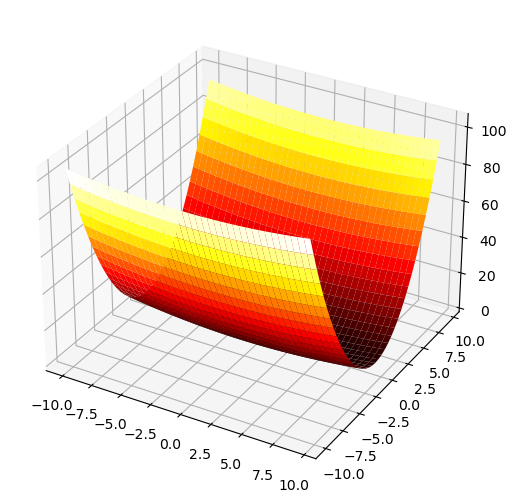

In [2]:
# 그림 6-1 f(x, y) = (1/20) * x**2 + y**2 그래프
# 3차원 참고주소: https://www.datascienceschool.net/view-notebook/6e71dbff254542d9b0a054a7c98b34ec/
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
X = np.arange(-10, 10, 0.5)
Y = np.arange(-10, 10, 0.5)
XX, YY = np.meshgrid(X, Y)
ZZ = (1 / 20) * XX**2 + YY**2

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(XX, YY, ZZ, rstride=1, cstride=1, cmap='hot')

(-10.0, 10.0)

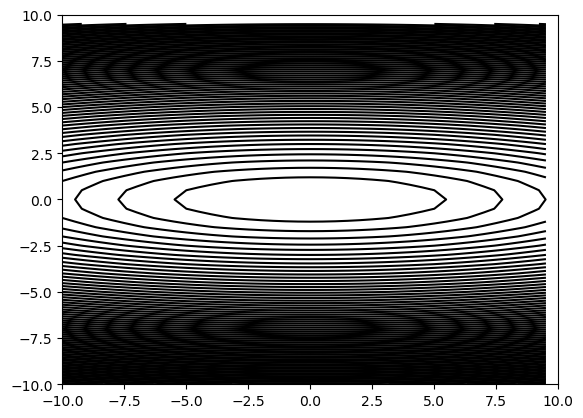

In [3]:
# 그림 6-1 f(x, y) = (1/20) * x**2 + y**2 등고선
plt.contour(XX, YY, ZZ, 100, colors='k')
plt.ylim(-10, 10)
plt.xlim(-10, 10)

식 6.2 기울기 특징

y축 방향은 가파른데 x 축 방향은 완만함.

기울기의 대부분은 (0,0) 방향을 가리키지 않음.

In [3]:
def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


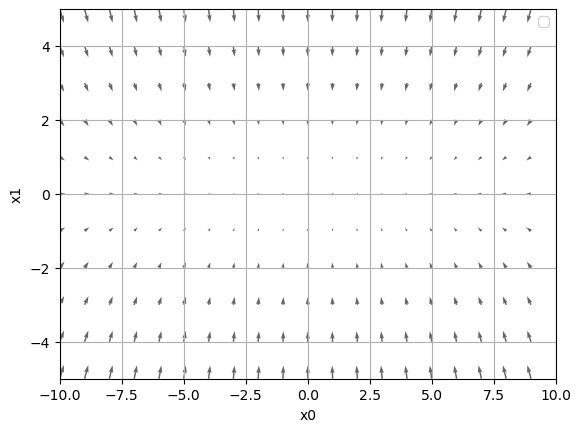

In [16]:
# 그림 6-2 f(x, y) = (1/20) * x**2 + y**2 의 기울기
# https://github.com/WegraLee/deep-learning-from-scratch/blob/master/ch04/gradient_2d.py 소스 참고
from mpl_toolkits.mplot3d import Axes3D

def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad

def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)
     
x0 = np.arange(-10, 10, 1)
x1 = np.arange(-10, 10, 1)
X, Y = np.meshgrid(x0, x1)
    
X = X.flatten()
Y = Y.flatten()

grad = numerical_gradient(function_2, np.array([(1/(20**0.5))*X, Y]) )
    
plt.figure()
plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
plt.xlim([-10, 10])
plt.ylim([-5, 5])
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()
plt.legend()
plt.draw()
plt.show()

SGD 단점 : 비등방성(anisotropy) 함수(방향에 따라 기울기가 달라지는 함수)에서 <u>탐색경로가 비효율적.</u>



### 6.1.4 모멘텀

모멘텀: Momentum, 운동량

#### 식 6.3 
$$
v := \alpha v - \eta \frac{\partial{L}}{\partial{W}}
$$

#### 식 6.4
$$
W := W + v
$$

$$
W : 갱신할 매개변수
$$
$$
\frac{\partial L}{\partial W} : 손실 함수의 기울기
$$
$$
\eta : 학습률, 미리 정해서 사용
$$

v : 물리에서 말하는 속도(velocity)

식 6.3 : 기울기 방향으로 힘을 받아 물체가 가속된다는 물리 법칙을 나타냄

식 6.4 : 모멘텀에 따라 공이 그릇의 바닥을 구르는 듯한 움직임을 보임

모멘텀의 구현

In [4]:
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.v[key] = self.momentum*self.v[key] - self.lr*grads[key]
            params[key] += self.v[key]

v: 물체의 속도

v는 초기화 때는 아무것도 담지 않고, update가 처음 호출될 때 같은 구조의 데이터를 딕셔너리 변수로 저장

모멘텀의 갱신경로는 공이 그릇 바닥을 구르듯 움직임

SGD와 비교하면 지그재그 정도가 덜함

### 6.1.5 AdaGrad

학습률 감소(learning rate decay) : 학습을 진행하면서 학습률을 점차 줄여가는 방법

개별 매개변수에 적응적으로(adative) 학습률을 조정하면서 학습을 진행

#### 식 6.5
$$
h := h + \frac{\partial{L}}{\partial{W}} \odot \frac{\partial{L}}{\partial{W}}
$$

#### 식 6.6
$$
W := W - \eta \frac{1}{\sqrt{h}} \frac{\partial{L}}{\partial{W}}
$$

$$
W : 갱신할 매개변수
$$
$$
\frac{\partial L}{\partial W} : 손실 함수의 기울기
$$
$$
\eta : 학습률, 미리 정해서 사용
$$

h : 기존 기울기 값을 제곱하여 계속 더해줌

매개변수를 갱신할 때 1/sqrt(h)을 곱해 학습률을 조정

AdaGrad는 학습을 진행할 수록 갱신 강도가 약해짐.

**RMSProp **

지수이동평균(Exponential Moving Average, EMA)를 이용하여 먼 과거의 기울기를 서서히 잊고 새로운 기울기 정보를 크게 반영.

AdaGrad의 구현

In [5]:
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
    
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
        
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

마지막 줄에서 1e-7이라는 작은 값을 더하는 부분이 0으로 나누는 사태를 막음

대부분의 딥러닝 프레임워크에서 이 값도 인수로 설정 가능

처음에는 크게 움직이지만 갱신 정도가 작아지도록 조정됨

### 6.1.6 Adam

모멘텀: 공이 그릇을 구르는 듯한 물리 법칙에 따르는 움직임

AdaGrad: 매개변수의 원소마다 적응적으로 갱신 정도를 조정

Adam: 모멘텀과 Adagrad 기법을 융합

매개변수 공간을 효율적으로 탐색. 하이터파라미터의 '편향 보정'이 진행됨

https://arxiv.org/pdf/1412.6980.pdf

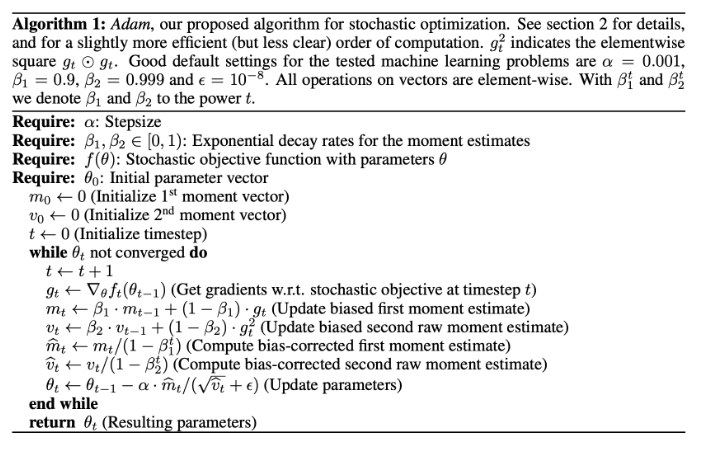

In [6]:
# https://github.com/WegraLee/deep-learning-from-scratch/blob/master/common/optimizer.py 참고
class Adam:

    """Adam (http://arxiv.org/abs/1412.6980v8)"""

    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
        
        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)         
        
        for key in params.keys():
            #self.m[key] = self.beta1*self.m[key] + (1-self.beta1)*grads[key]
            #self.v[key] = self.beta2*self.v[key] + (1-self.beta2)*(grads[key]**2)
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])
            
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)
            
            #unbias_m += (1 - self.beta1) * (grads[key] - self.m[key]) # correct bias
            #unbisa_b += (1 - self.beta2) * (grads[key]*grads[key] - self.v[key]) # correct bias
            #params[key] += self.lr * unbias_m / (np.sqrt(unbisa_b) + 1e-7)

### 6.1.7 어느 갱신 방법을 이용할 것인가?

네 기법의 결과를 비교

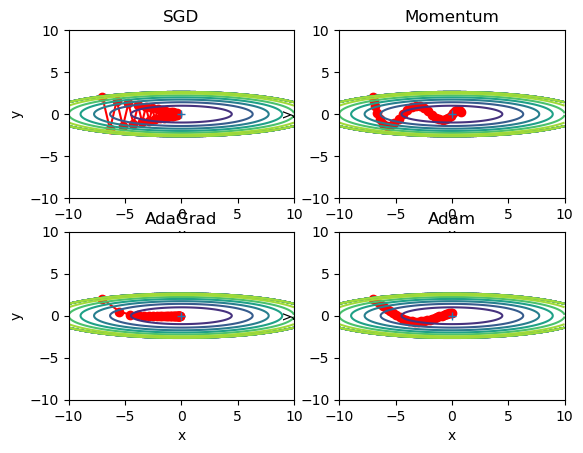

In [9]:
# https://github.com/WegraLee/deep-learning-from-scratch/blob/master/ch06/optimizer_compare_naive.py 참고
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict

def f(x, y):
    return x**2 / 20.0 + y**2

def df(x, y):
    return x / 10.0, 2.0*y

init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0


optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.95)
optimizers["Momentum"] = Momentum(lr=0.1)
optimizers["AdaGrad"] = AdaGrad(lr=1.5)
optimizers["Adam"] = Adam(lr=0.3)

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
    

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # 외곽선 단순화
    mask = Z > 7
    Z[mask] = 0
    
    # 그래프 그리기
    plt.subplot(2, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    #colorbar()
    #spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()

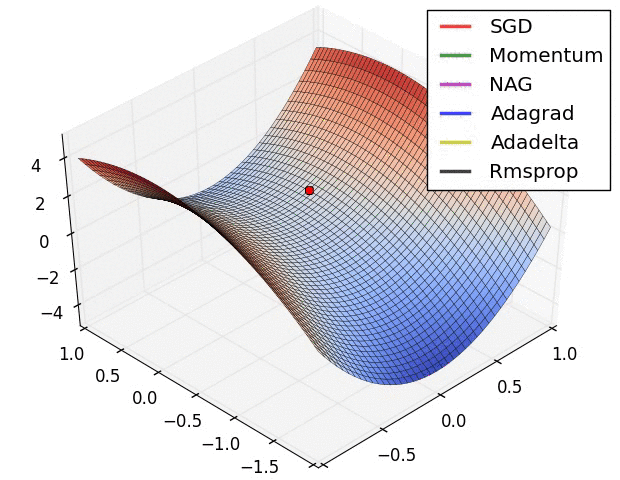

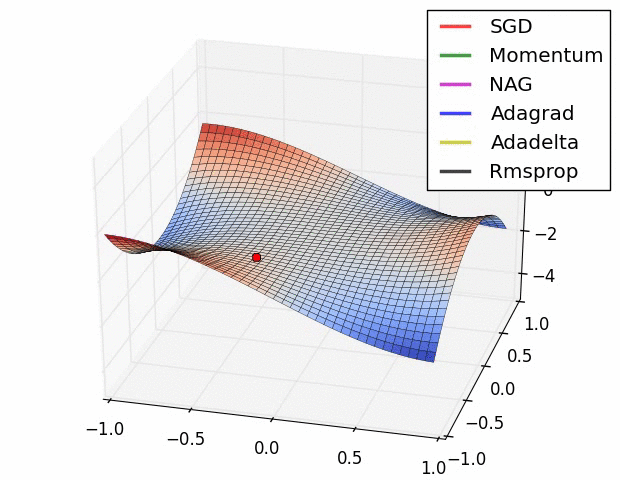

문제가 무엇이냐에 따라 사용할 기법이 달라짐

하이퍼 파라미터를 어떻게 설정하느냐에 따라서 결과도 바뀜

모든 문제에서 항상 뛰어난 기법은 아직 없음

이 책에서는 SGD, Adam을 많이 사용.

===========iteration:0===========
SGD:2.39133719989841
Momentum:2.271091022855951
AdaGrad:2.2594432987178013
Adam:2.1846765146386815
===========iteration:100===========
SGD:1.5355838289924877
Momentum:0.3155823998975074
AdaGrad:0.13408490116272637
Adam:0.26487530876798465
===========iteration:200===========
SGD:0.9022701189543836
Momentum:0.3921505082631056
AdaGrad:0.21558013597560755
Adam:0.3188682035742121
===========iteration:300===========
SGD:0.624350004828409
Momentum:0.1662162733149194
AdaGrad:0.06651267411948068
Adam:0.13674474332286002
===========iteration:400===========
SGD:0.5308450871268666
Momentum:0.21152691778503765
AdaGrad:0.13583107243923193
Adam:0.2574612195289627
===========iteration:500===========
SGD:0.4525058584840503
Momentum:0.22718939658502862
AdaGrad:0.1011236352636055
Adam:0.17032021227444014
===========iteration:600===========
SGD:0.5626633671063638
Momentum:0.2871250763142241
AdaGrad:0.10844070637224451
Adam:0.15670748852983635
===========iteration:700=====

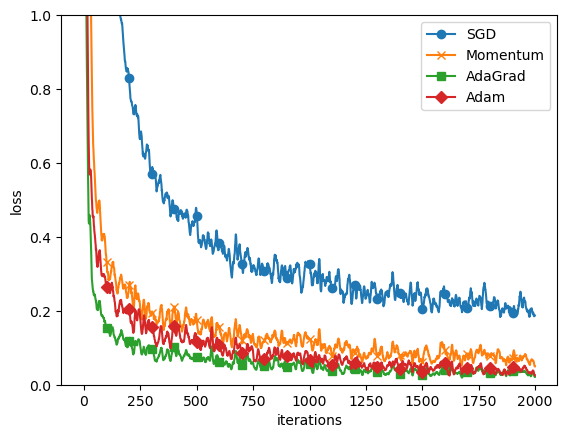

In [10]:
# https://github.com/WegraLee/deep-learning-from-scratch/blob/master/ch06/optimizer_compare_mnist.py 참고
# coding: utf-8
#import os
#import sys
#sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
#from common.optimizer import *

# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000

# 1. 실험용 설정==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    

# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))

# 3. 그래프 그리기==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

각 층이 100개의 뉴런으로 구성된 5층 신경망에서 ReLU를 활성화 함수로 사용해 측정

하이퍼파라미터인 학습률과 신경망의 구조(층 깊이 등)에 따라 결과가 달라짐

일반적으로 SGD보다 다른 세 기법이 빠르게 학습하고, 때로는 최종 정확도도 높음

## 6.2 가중치의 초기값

가중치의 초기값을 무엇으로 설정하느냐가 신경망 학습의 성패를 가름

### 6.2.1 초기값을 0으로 하면?

가중치 감소(weight decay) 

* 가중치 매개변수 값이 작아지도록 학습하는 방법.
* 가중치 값을 작게 하여 오버피팅이 일어나지 않음.

초기값을 작게 하기 위해 0.01 * np.random.randn(10,100) 처럼 정규분포로 생성된 값에 0.01을 곱함

초기값을 모두 0으로 해서는 안되는 이유?

오차역전법에서 모든 가중치의 값이 똑같이 갱신되기 때문

* 순전파: 입력파의 가중치가 0이기 때문에 두 번째 층의 뉴런에 모두 같은 값이 전달
* 역전파: 가중치가 모두 똑같이 갱신

### 6.2.2 은닉층의 활성화값 분포

가중치의 초기값에 따라 은닉층 활성화 값들이 어떻게 변화는지 실험

각 층의 활성화값 분포를 히스토그램으로 그림

In [11]:
# https://github.com/WegraLee/deep-learning-from-scratch/blob/master/ch06/weight_init_activation_histogram.py 참고
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def ReLU(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

def get_activation(hidden_layer_size, x, w, a_func=sigmoid):
    for i in range(hidden_layer_size):
        if i != 0:
            x = activations[i-1]

        a = np.dot(x, w)

        # 활성화 함수도 바꿔가며 실험해보자！
        z = a_func(a)
        # z = ReLU(a)
        # z = tanh(a)

        activations[i] = z
    return activations
    
# 초깃값을 다양하게 바꿔가며 실험해보자！
w = np.random.randn(node_num, node_num) * 1
# w = np.random.randn(node_num, node_num) * 0.01
# w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
# w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)

z = sigmoid
# z = ReLU
# z = tanh

activations = get_activation(hidden_layer_size, x, w, z)

표준편차가 1인 정규분포의 활성화값들의 분포

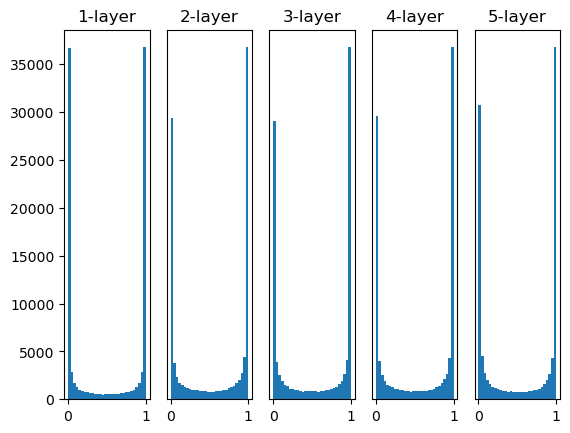

In [12]:
# 히스토그램 그리기
def get_histogram(activations):
    for i, a in activations.items():
        plt.subplot(1, len(activations), i+1)
        plt.title(str(i+1) + "-layer")
        if i != 0: plt.yticks([], [])
        # plt.xlim(0.1, 1)
        # plt.ylim(0, 7000)
        plt.hist(a.flatten(), 30, range=(0,1))
    plt.show()

get_histogram(activations)

기울기 소실(gradient vanishing) 

데이터가 0과 1에 치우쳐 분포하게 되면 역전파 기울기 값이 점점 작아지다 사라짐

가중치의 표준편차를 0.01로 변경

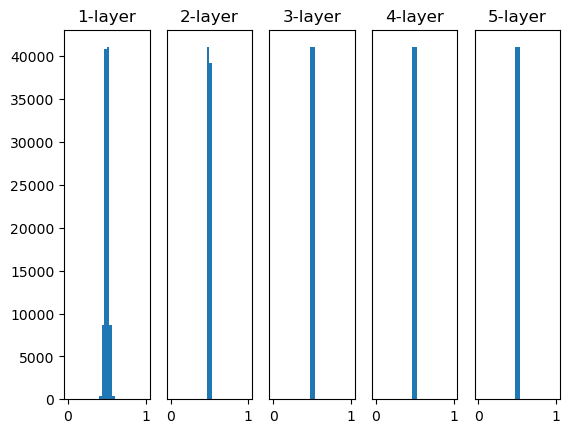

In [13]:
w = np.random.randn(node_num, node_num) * 0.01
activations = get_activation(hidden_layer_size, x, w, z)
get_histogram(activations)

0.5 부근에 집중. 활성화값들이 치우쳤다는 것은 표현력 관점에서 큰 문제

표현력을 제한: 예를 들어 뉴런 100개가 거의 같은 값을 출력한다면 뉴런 1개짜리와 별반 다를게 없음

<u>Xavier 초기값</u>

앞 계층의 노드가 n개라면 표준편차가 1 / np.sqrt(n)인 정규분포를 사용

사비에르 논문은 앞 층의 노드 수 외에 다음 출력 노드 수도 고려한 설정 값 제안.

카페 등의 프레임워크는 앞층의 입력 노드만으로 계산하도록 단순화.

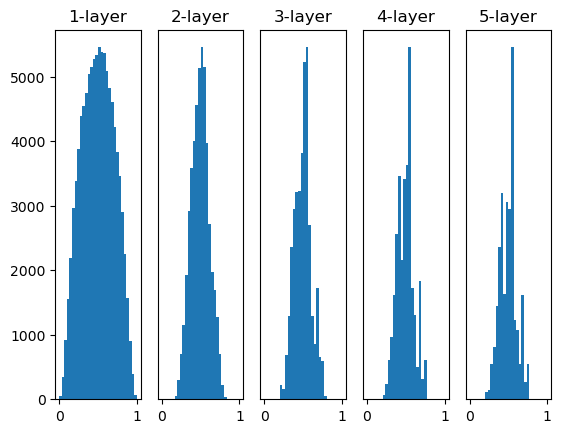

In [14]:
# Xavier 초기값
w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
activations = get_activation(hidden_layer_size, x, w, z)
get_histogram(activations)

층이 깊어지면서 형태가 다소 일그러지지만, 넓게 분포됨

시그모이드 함수의 표현력도 제한받지 않고 학습이 효율적으로 이뤄질 것

### 6.2.3 ReLU를 사용할 때의 가중치 초기값

sigmoid, tanh는 좌우 대칭이라 Xavier 초기값이 적당

He 초기값

ReLu에 특화된 초기값. 

앞 계층의 노드가 n일 때 표준편차가 2 / np.sqrt(n)인 정규분포를 사용

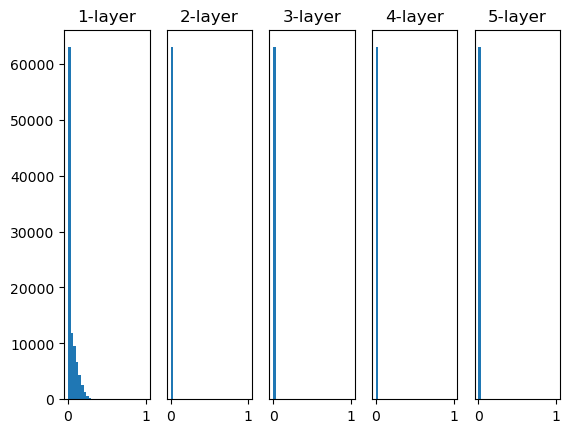

In [15]:
# 표준편차가 0.01인 정규분포를 가중치 초기값으로 사용한 경우
w = np.random.randn(node_num, node_num) * 0.01
z = ReLU
activations = get_activation(hidden_layer_size, x, w, z)
get_histogram(activations)

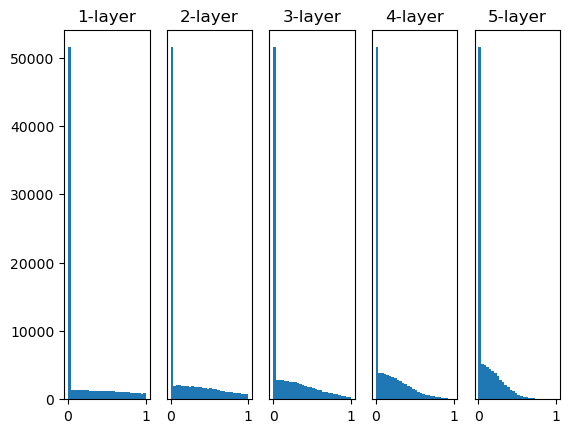

In [16]:
# Xavier 초기값을 사용한 경우
w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
activations = get_activation(hidden_layer_size, x, w, z)
get_histogram(activations)

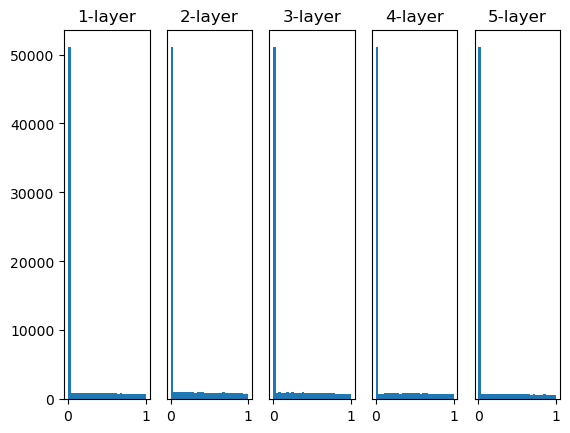

In [17]:
# He 초기값을 사용한 경우
w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)
activations = get_activation(hidden_layer_size, x, w, z)
get_histogram(activations)

std = 0.01일 때

각 층의 활성화 값들이 아주 작은 값들. 역전파의 가중치의 기울기 역시 작아짐. 실제로 학습이 거의 이뤄지지 않음

Xavier 초기값일 때

층이 깊어지면 활성화값들이 치우침. 학습할 때 '기울기 소실'문제.

He 초기값일 때

모든 층에서 균일하게 분포.

실험결과

활성화 함수로 ReLU를 사용할 때 He 초기값.

활성화 함수로 sigmoid, tanh 등 S자 모양 곡선일 때는 Xavier 초기값.

### 6.2.4 MNIST 데이터셋으로 본 가중치 초기값

실제 데이터로 가중치의 초기값을 주는 방법이 신경망 학습에 얼마나 영향을 주는지 그래프

===========iteration:0===========
std=0.01:2.3024947945009835
Xavier:2.316958403704122
He:2.335006422177938
===========iteration:100===========
std=0.01:2.3027985378097906
Xavier:2.255712495448846
He:1.650518596215438
===========iteration:200===========
std=0.01:2.3021857565680195
Xavier:2.102443688217866
He:0.8300125651022996
===========iteration:300===========
std=0.01:2.3030368565210058
Xavier:1.7753227014278754
He:0.6211032238467633
===========iteration:400===========
std=0.01:2.30165539146866
Xavier:1.1562621824408248
He:0.4177673647330044
===========iteration:500===========
std=0.01:2.2991750933165855
Xavier:0.7857610875656913
He:0.3757384103125112
===========iteration:600===========
std=0.01:2.3013603828192566
Xavier:0.5878048177702707
He:0.32220726352887097
===========iteration:700===========
std=0.01:2.301482008736743
Xavier:0.48953668139937623
He:0.33982854726325734
===========iteration:800===========
std=0.01:2.301511203584368
Xavier:0.4270334308655155
He:0.2914401274755102


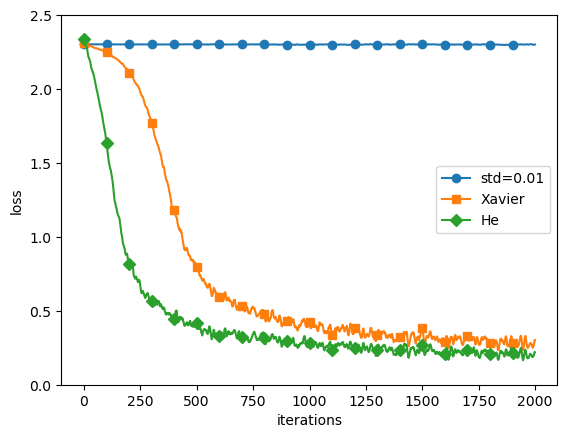

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
#from common.optimizer import SGD


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

층별 뉴런 수가 100개인 5층 신경망에서 활성화 함수로 ReLu를 사용.

표준편차가 0.01일 때 학습이 전혀 이뤄지지 않음

Xaview, He 초기값은 학습이 순조로움. He 초기값이 학습진도가 빠름.

## 6.3 배치 정규화

배치 정규화: 각 층의 활성화를 적당히 분포되도록 조정

### 6.3.1 배치 정규화 알고리즘

배치 정규화가 주목받는 이유

* 학습을 빨리 진행할 수 있다.
* 초기값에 크게 의존하지 않는다.
* 오버피팅을 억제한다.

배치정규화: 학습시 미니배치를 단위로 정규화

데이터 분포가 평균이 0, 분산이 1이 되도록 정규화

#### 식 6.7
$$
\mu_{B} := \frac{1}{m} \sum^{m}_{i=1} x_{i}
$$
$$
\sigma^{2}_{B} := \frac{1}{m} \sum^{m}_{i=1} (x_{i} - \mu_{B})^{2}
$$
$$
x_{i} := \frac{x_{i}-\mu_{B}}{\sqrt{\sigma^{2}_{B}+\epsilon}}
$$

미니배치 B={x1, x2, ..., xm}

m개의 입력 데이터의 집합에 대해 평균과 분산을 구함.

그 입력 데이터를 평균이 0, 분산이 1이 되게 (적절한 분포가 되게) 정규화

배치 정규화 계층마다 정규화된 데이터에 고유한 확대와 이동 변환을 수행

#### 식 6.8
$$
y_{i} = \gamma \hat{x_{i}} + \beta
$$

두 값은 처음에는 1, 0으로 (원본 그대로) 학습하면서 적합한 값으로 조정

배치 정규화의 계산그래프

https://kratzert.github.io/2016/02/12/understanding-the-gradient-flow-through-the-batch-normalization-layer.html

### 6.3.2 배치 정규화의 효과

MNIST 셋을 사용하여 배치 정규화 계층을 사용할 때와 사용하지 않을 때 학습 진도

가중치 초기값의 표준편차를 다양하게 바꿔가며 학습 경과를 관찰한 그래프

c:\Users\patrick\Projects\ds4th_study\source\밑바닥부터_시작하는_딥러닝\common\functions.py:56: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size
c:\Users\patrick\Projects\ds4th_study\source\밑바닥부터_시작하는_딥러닝\common\functions.py:34: RuntimeWarning: invalid value encountered in subtract
  x = x - np.max(x, axis=0)
c:\Users\patrick\Projects\ds4th_study\source\밑바닥부터_시작하는_딥러닝\common\multi_layer_net_extend.py:104: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
c:\Users\patrick\Projects\ds4th_study\source\밑바닥부터_시작하는_딥러닝\common\multi_layer_net_extend.py:104: RuntimeWarning: invalid value encountered in scalar multiply
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)


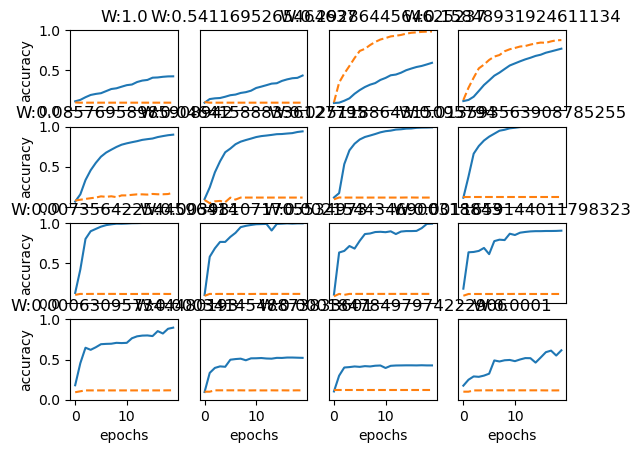

In [20]:
# https://github.com/WegraLee/deep-learning-from-scratch/blob/master/ch06/batch_norm_test.py 참고
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
#from common.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 학습 데이터를 줄임
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            #print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list


# 그래프 그리기==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    #print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    # plt.legend(loc='lower right')
    
plt.show()

거의 모든 경우에 배치 정규화를 사용할 때 학습 진도가 빠른 것으로 나타남

## 6.4 바른 학습을 위해

오버피팅: 신경망의 훈련 데이터에만 지나치게 적응되어 그 외의 데이터에 제대로 대응하지 못하는 상태

### 6.4.1 오버피팅

오버피팅이 발생하는 경우
* 매개변수가 많고 표현력이 높은 모델
* 훈련 데이터가 적음

이 두 요건을 일부러 충족하여 오버티핑 발생.

훈련 데이터 중 300개만 사용. 7층 네트워크를 사용해 네트워크 복잡성을 높임.

각 층의 뉴런은 100개 활성화 함수는 ReLU를 사용.

In [8]:
# https://github.com/WegraLee/deep-learning-from-scratch/blob/master/ch06/overfit_weight_decay.py 참고
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)
# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from common.multi_layer_net import MultiLayerNet
#from common.optimizer import SGD

# weight decay（가중치 감쇠） 설정 =======================
weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
#weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break

epoch:0, train acc:0.11666666666666667, test acc:0.0943
epoch:1, train acc:0.12333333333333334, test acc:0.1069
epoch:2, train acc:0.15333333333333332, test acc:0.124
epoch:3, train acc:0.19333333333333333, test acc:0.142
epoch:4, train acc:0.23666666666666666, test acc:0.1655
epoch:5, train acc:0.2866666666666667, test acc:0.1947
epoch:6, train acc:0.31333333333333335, test acc:0.2236
epoch:7, train acc:0.34, test acc:0.2526
epoch:8, train acc:0.38, test acc:0.2797
epoch:9, train acc:0.4066666666666667, test acc:0.2976
epoch:10, train acc:0.44, test acc:0.2989
epoch:11, train acc:0.4666666666666667, test acc:0.3184
epoch:12, train acc:0.4766666666666667, test acc:0.3271
epoch:13, train acc:0.5, test acc:0.3481
epoch:14, train acc:0.5233333333333333, test acc:0.3603
epoch:15, train acc:0.5166666666666667, test acc:0.3666
epoch:16, train acc:0.5666666666666667, test acc:0.3908
epoch:17, train acc:0.5833333333333334, test acc:0.4066
epoch:18, train acc:0.5966666666666667, test acc:0.4198

train_acc_list와 test_acc_list에는 에폭단위의 정확도를 저장.

이 두 리스트를 다음처럼 그래프로 그림

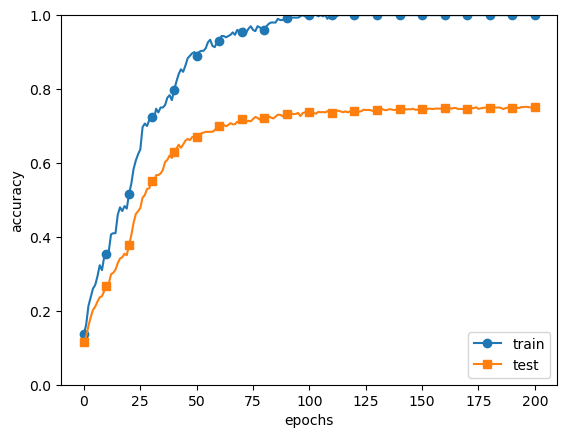

In [22]:
# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

정확도가 크게 벌어지는 것은 훈련 데이터에만 적응(fitting)한 결과

### 6.4.2 가중치 감소

가중치 감소(weight decay) 

학습 과정에서 큰 가중치에 대해서는 그에 상응하는 큰 패널티를 부과하여 오버피팅을 억제하는 방법

가중치를 W라 하면 L2 법칙에 따른 가중치 감소는 1/2 λ (W\*\*2) 가 되고 이 값을 손실함수에 더함

λ(람다)는 정규화의 세기를 조절하는 하이퍼파라미터. 이 값을 크게 설정할 수록 큰 가중치에 대한 패널티가 커짐

L2 법칙

W = (W1, W2, ..., Wn)이 있다면 

L2 법칙은

$$
\sqrt{W_{1}^{2}+W_{2}^{2} + ... + W_{n}^{2}}
$$

가중치 감소(λ=0.1)를 적용한 결과

epoch:0, train acc:0.1, test acc:0.0936
epoch:1, train acc:0.10333333333333333, test acc:0.089
epoch:2, train acc:0.1, test acc:0.0903
epoch:3, train acc:0.11666666666666667, test acc:0.0924
epoch:4, train acc:0.14, test acc:0.0995
epoch:5, train acc:0.14, test acc:0.1115
epoch:6, train acc:0.16333333333333333, test acc:0.1293
epoch:7, train acc:0.19333333333333333, test acc:0.1433
epoch:8, train acc:0.23333333333333334, test acc:0.1586
epoch:9, train acc:0.26666666666666666, test acc:0.1787
epoch:10, train acc:0.29, test acc:0.1928
epoch:11, train acc:0.30333333333333334, test acc:0.2092
epoch:12, train acc:0.32666666666666666, test acc:0.2199
epoch:13, train acc:0.3333333333333333, test acc:0.2238
epoch:14, train acc:0.33666666666666667, test acc:0.2244
epoch:15, train acc:0.3466666666666667, test acc:0.2222
epoch:16, train acc:0.36333333333333334, test acc:0.2344
epoch:17, train acc:0.37333333333333335, test acc:0.2393
epoch:18, train acc:0.36666666666666664, test acc:0.2409
epoch:1

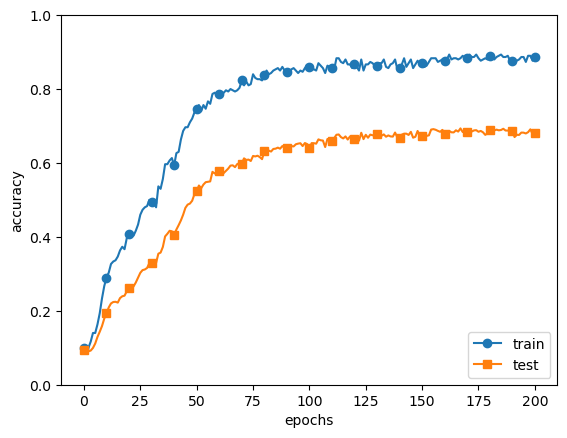

In [23]:
# weight decay（가중치 감쇠） 설정 =======================
#weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break
            
# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

훈련 데이터에 대한 정확도와 시험 데이터에 대한 정확도는 그림 6-20에 비해 줄었음

오버피팅이 억제됨

### 6.4.3 드롭아웃

신경망 모델이 복잡해지면 가중치 감소만으로는 대응하기 어려움

드롭아웃 : 뉴런을 임의로 삭제하면서 학습하는 방법

훈련 때에는 데이터를 흘릴 때마다 삭제할 뉴런을 무작위로 선택.

시험 때에는 모든 뉴런에 신호를 전달. 각 뉴런의 출력에 훈련 때 삭제한 비율을 곱하여 출력.

드롭아웃 구현

In [10]:
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None
        
    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)
        
    def backward(self, dout):
        return dout * self.mask

훈련 시에는 순전파 때마다 self.mask에 삭제할 뉴런을 False로 표시

역전파 때의 동작은 ReLU와 같음.

순전파 때 통과시키지 않은 뉴런은 역전파 때도 신호를 차단.

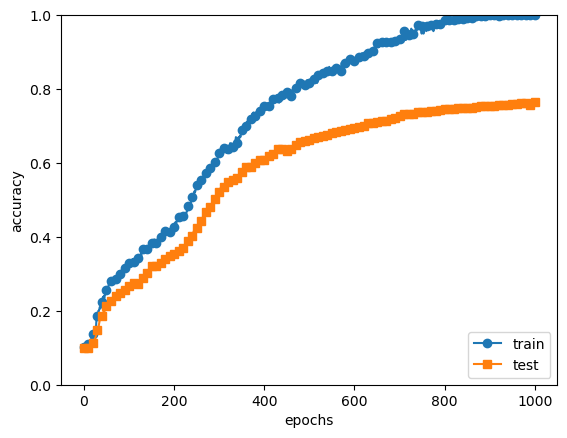

In [11]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# 드롭아웃 사용 유무와 비울 설정 ========================
use_dropout = True  # 드롭아웃을 쓰지 않을 때는 False
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=1001, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=False)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

드롭아웃을 적용하니 훈련 데이터와 시험 데이터에 대한 정확도 차이가 줄었음

드롭아웃을 이용하면 표현력을 높이면서 오버피팅을 억제가능

앙상블 학습(ensenble learning)

같은 구조의 네트워크를 여러 개 준비하여 따로따로 학습. 여러 개의 출력을 평균내어 답변

드롭아웃은 앙상블 학습과 같은 효과를 (대략) 하나의 네트워크로 구현했다고 볼 수 있음

## 6.5 적절한 하이퍼파라미터 값 찾기

각 층의 뉴런수, 배치 크기, 매개변수 갱신 시의 학습률과 가중치 감소 등

하이퍼파라미터 값을 최대한 효율적으로 탐색하는 방법

### 6.5.1 검증 데이터

하이퍼 파라미터 성능을 평가할 때는 시험 데이터를 사용해서는 안됨

* 하이퍼파라미터 값이 시험 데이터에 오버피팅되기 때문

검증 데이터(validation data) : 하이퍼파라미터 전용 확인 데이터

훈련 데이터 : 매개변수 학습

시험 데이터 : 신경망의 범용 성능 평가

데이터셋에 따라서는 훈련 데이터, 검증 데이터, 시험 데이터를 미리 분리해둔 것도 있음

MNIST 데이터셋에서 검증 데이터를 얻는 가장 간단한 방법은 훈련 데이터 중 20% 정도를 검증 데이터로 먼저 분리

In [26]:
from dataset.mnist import load_mnist
from common.util import shuffle_dataset

(x_train, t_train), (x_test, t_test) = load_mnist()

# 훈련 데이터를 뒤섞는다.
x_train, t_train = shuffle_dataset(x_train, t_train)

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)

x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]

훈련 데이터를 분리하기 전에 입력 데이터와 정답 레이블을 shuffle_dataset으로 뒤섞음

데이터 셋 안의 데이터가 치우쳐 있을지 모르기 때문

### 6.5.2 하이퍼파라미터 최적화

하이퍼파라미터 최적화 단계

* 0단계: 하이퍼파라미터 값의 범위를 설정
* 1단계: 설정된 범위에서 하이퍼파라미터의 값을 무작위로 추출
<pre>
무작위로 샘플링해 탐색하는 것이 좋은 결과. 최정 정확도에 미치는 영향력이 하이퍼파라미터마다 다르기 때문
'10의 계승'단위로 범위를 지정. 로그 스케일(log scale)로 지정.
</pre>
* 2단계: 1단계에서 샘플링한 하이퍼파라미터 값을 사용하여 학습하고, 정확도를 평가. (에폭은 작게 설정)
* 3단계: 1단계와 2단계를 특정 횟수(100회 등) 반복하며, 그 정확도의 결과를 보고 하이퍼파라미터의 범위를 좁힌다.

베이즈 최적화(Bayesian optimization)

베이즈 정리(Bayes' theorem)를 중심으로 한 수학 이론을 구사하여 더 엄밀하고 효율적으로 최적화를 수행

### 6.5.3 하이퍼파라미터 최적화 구현하기

하이퍼파라미터 검증은 로그 스케일 범위에서 무작위로 추출해 수행

파이썬코드로는 10 \*\* np.random.uniform(-3,3)처럼 작성.

이 예에서는 가중치 감소 계수를 10<sup>-8</sup>~10<sup>-4</sup>, 학습률을 10<sup>-6</sup>~10<sup>-2</sup> 범위부터 시작.

하이퍼파라미터 무작위 추출코드

In [27]:
weight_decay = 10**np.random.uniform(-8,-4)
lr = 10**np.random.uniform(-6,-2)

가중치 감소 계수 범위를 10<sup>-8</sup> ~ 10<sup>-4</sup>, 학습률의 범위를 10<sup>-6</sup>~10<sup>-2</sup> 실험한 결과

val acc:0.07 | lr:1.9703291935721906e-06, weight decay:5.545498666140696e-06
val acc:0.16 | lr:4.2854858713050116e-05, weight decay:6.109514582397869e-05
val acc:0.12 | lr:7.110337193306543e-06, weight decay:2.182670019405416e-07
val acc:0.63 | lr:0.0045200519954158615, weight decay:1.1046691980663615e-05
val acc:0.08 | lr:1.07903335144228e-05, weight decay:6.322254442723003e-08
val acc:0.13 | lr:9.846104487231688e-06, weight decay:8.566060653232776e-07
val acc:0.42 | lr:0.002023855233727062, weight decay:7.01822823013649e-06
val acc:0.42 | lr:0.0015149324597448941, weight decay:2.005108571709502e-07
val acc:0.13 | lr:8.975150358718985e-05, weight decay:2.7667805863818205e-07
val acc:0.14 | lr:6.774365475065485e-05, weight decay:1.181156348755397e-05
val acc:0.15 | lr:0.0003077673662790682, weight decay:1.1195461774222144e-08
val acc:0.15 | lr:0.00048434848548286415, weight decay:1.900412017784486e-08
val acc:0.19 | lr:0.00024063835428505599, weight decay:6.477865614709835e-05
val acc:

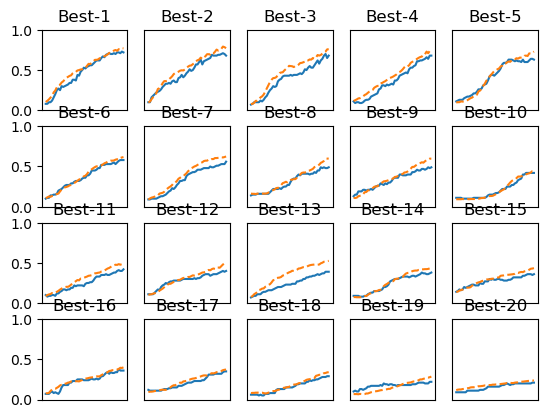

val acc:0.47 | lr:0.002981362198307776, weight decay:3.640560085165792e-06
val acc:0.71 | lr:0.008635777419394806, weight decay:1.8451650562446707e-05
val acc:0.16 | lr:1.5215897347493501e-06, weight decay:9.408566163138185e-05
val acc:0.04 | lr:1.1751400751308323e-06, weight decay:1.7633669968360159e-06
val acc:0.44 | lr:0.002588464580720936, weight decay:4.152400737526213e-06
val acc:0.1 | lr:1.8428172150215045e-06, weight decay:6.6847703347607195e-06
val acc:0.69 | lr:0.00727042659898171, weight decay:1.2901610765967882e-08
val acc:0.16 | lr:5.971740364118112e-05, weight decay:4.7463299435110356e-05
val acc:0.16 | lr:5.3491268910303225e-05, weight decay:1.0582729867353693e-05
val acc:0.11 | lr:0.0004848304589414337, weight decay:3.83950639166824e-07
val acc:0.59 | lr:0.004852441369679865, weight decay:8.956857765838772e-05
val acc:0.42 | lr:0.001285263694113876, weight decay:2.5331752263946677e-05
val acc:0.26 | lr:0.001371943760663264, weight decay:9.554247210577233e-08
val acc:0.0

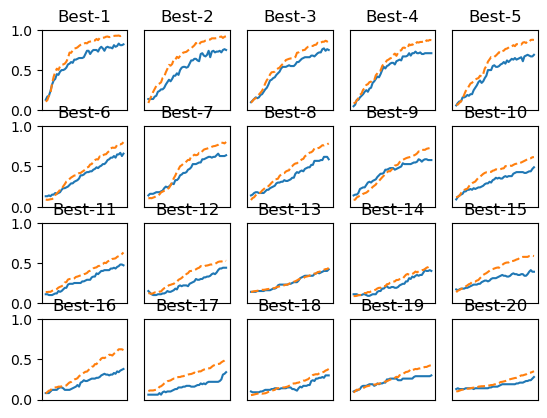

In [32]:
# https://github.com/WegraLee/deep-learning-from-scratch/blob/master/ch06/hyperparameter_optimization.py 참고
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 결과를 빠르게 얻기 위해 훈련 데이터를 줄임
x_train = x_train[:500]
t_train = t_train[:500]

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# 하이퍼파라미터 무작위 탐색======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 탐색한 하이퍼파라미터의 범위 지정===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# 그래프 그리기========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 결과를 빠르게 얻기 위해 훈련 데이터를 줄임
x_train = x_train[:500]
t_train = t_train[:500]

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list

d
# 하이퍼파라미터 무작위 탐색======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 탐색한 하이퍼파라미터의 범위 지정===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# 그래프 그리기========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()

Best-5 정도까지 학습이 순조롭게 진행.

결과로 볼 때 학습률은 0.001 ~ 0.01, 가중치 감소 계수는 10<sup>-8</sup> ~ 10<sup>-6</sup> 정도임을 알 수 있음.

다음은 축소된 범위로 똑같은 작업을 반복.

범위를 좁혀가다가 특정 단계에서 최종 하이퍼파라미터 값을 하나 선택.

## 6.6 정리

**이번 장에서 배운 것**

매개변수 갱신 방벙에는 확률적 경사 하강법(SGD) 외에도 모멘텀, AdaGrad, Adam 등이 있음

가중치 초기값을 정하는 방법은 올바른 학습을 하는데 매우 중요

가중치의 초기값은 Xavier 초기값(Sigmoid, tanh)과 He 초기값(ReLU)이 효과적

배치 정규화(normalization)를 이용하면 학습을 빠르게 진행, 초기값에 영향을 덜 받게 됨

오버피팅을 억제하는 정규화(regularization) 기술로는 가중치 감소와 드롭아웃이 있음

하이퍼파라미터 값 탐색은 최적 값이 존재할 법한 범위를 점차 좁히면서 하는 것이 효과적